<a href="https://colab.research.google.com/github/tamarasessink/Master_Thesis/blob/master/Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/tamarasessink/Master_Thesis.git

Cloning into 'Master_Thesis'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 55 (delta 27), reused 33 (delta 12), pack-reused 0
Unpacking objects: 100% (55/55), done.


In [2]:
import h5py

In [20]:
!python /content/Master_Thesis/main_moco.py \
  --lr 0.03 \
  --batch-size 256 \
  --dist-url 'tcp://localhost:10001' --multiprocessing-distributed --world-size 1 --rank 0 \


Use GPU: 0 for training
=> creating model 'resnet50'
MoCo(
  (encoder_q): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplac

(5734, 18, 288, 288)


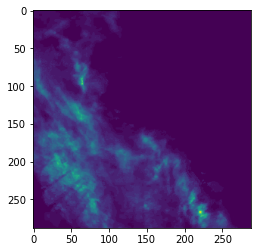

In [12]:
import pylab as plt
import numpy as np
from torch.utils import data

f = h5py.File('/content/drive/MyDrive/train_test_2016-2019_input-length_12_img-ahead_6_rain-threshhold_50.h5', "r")
traindir = f['/train/images']
data_loader = data.DataLoader(traindir)
# for x in data_loader:
#   print(x)
print(traindir.shape)
test = np.reshape(traindir[0][17:], (288,288))
test = test*10000
plt.imshow(test)

In [ ]:
!git push https://github.com/tamarasessink/Master_Thesis.git

fatal: not a git repository (or any of the parent directories): .git


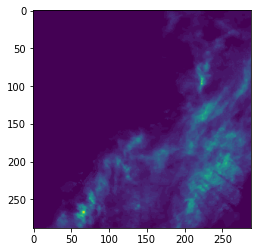

In [4]:
import torchvision.transforms as transforms
from PIL import Image
# after agmentation
image = Image.fromarray(np.uint8(test))

transform = transforms.RandomHorizontalFlip(p=0.8)
img = transform(image)
plt.imshow(img)

mean and std before normalize:
Mean of the image: tensor([0.0188])
Std of the image: tensor([0.0278])


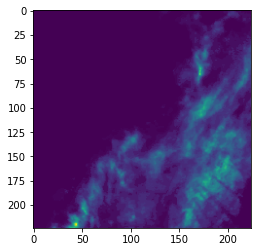

In [5]:
import torch
# we only have 1 not 3 dimensions per image thus only 1 mean and std
transform = transforms.Compose([
    transforms.ToTensor()
])
# get tensor image
img_tr = transform(image)
# calculate mean and std
mean, std = img_tr.mean([1,2]), img_tr.std([1,2])
# print mean and std
print("mean and std before normalize:")
print("Mean of the image:", mean)
print("Std of the image:", std)


normalize = transforms.Normalize(mean=[0.0188],
                                     std=[0.0278])
augmentation = [transforms.RandomResizedCrop(224, scale=(0.2, 1.)),
            transforms.RandomGrayscale(p=0.2),
            transforms.ColorJitter(0.4, 0.4, 0.4, 0.4),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(), normalize]
aug = transforms.Compose(augmentation)
img = aug(image)
test2 =  torch.squeeze(img,0)
plt.imshow(test2)



(314958, 288, 288)


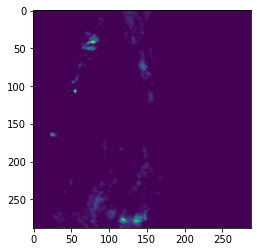

In [ ]:
f = h5py.File("/content/drive/MyDrive/RAD_NL25_RAC_5min_train_test_2016-2019.h5", "r")
trainbefore = f["train"]["images"]
print(trainbefore.shape)
plt.imshow(trainbefore[10])


In [ ]:
from google.colab import drive
drive.mount('/content/drive')